_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [ ]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Parking Availability</div>

<div class="usecase-authors"><b>Authored by: </b> Angie Hollingworth, Siju Deng</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

### new

In [34]:
## try 10 api
import requests
import pandas as pd

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
SENSOR_DATASET = 'on-street-parking-bay-sensors'
NUMBER_OF_RECORDS = 10
API_KEY = 'api_key=558000cd83c1d1ba8c4a5e09e0063424750542b70b132293e63b645a'

FILTERS = f'records?limit={NUMBER_OF_RECORDS}&offset=0&timezone=UTC'
SENSOR_URL = f'{BASE_URL}{SENSOR_DATASET}/{FILTERS}&{API_KEY}'

try:
    result = requests.get(SENSOR_URL)
    result.raise_for_status()
    result_json = result.json()
    records = result_json.get('results')
    if records is None:
        print("No 'results' field in the response")
    else:
        data = []
        for record in records:
            record['location']['lat'] = round(record['location']['lat'], 3)
            record['location']['lon'] = round(record['location']['lon'], 3)
            data.append(record)
        df = pd.DataFrame(data)
        # Print the DataFrame
        display(df)
except requests.RequestException as e:
    print(f"Request failed: {e}")


,lastupdated,status_timestamp,zone_number,status_description,parkingbay_id,location
0,2023-07-20T05:44:36+00:00,2023-07-19T21:24:38+00:00,7358,Unoccupied,7075,"{'lon': 144.969, 'lat': -37.815}"
1,2023-07-20T05:44:36+00:00,2023-07-20T05:23:46+00:00,7358,Present,7076,"{'lon': 144.969, 'lat': -37.815}"
2,2023-07-20T05:44:36+00:00,2023-07-20T04:46:01+00:00,7358,Unoccupied,7077,"{'lon': 144.969, 'lat': -37.815}"
3,2023-07-24T06:44:36+00:00,2023-07-24T06:16:08+00:00,7638,Unoccupied,5852,"{'lon': 144.968, 'lat': -37.813}"
4,2023-07-24T06:44:36+00:00,2023-07-24T05:50:20+00:00,7638,Unoccupied,5874,"{'lon': 144.968, 'lat': -37.813}"
5,2023-07-24T06:44:36+00:00,2023-07-24T03:45:31+00:00,7674,Present,8149,"{'lon': 144.969, 'lat': -37.814}"
6,2023-07-24T06:44:36+00:00,2023-07-24T06:38:36+00:00,7674,Present,8148,"{'lon': 144.969, 'lat': -37.814}"
7,2023-07-24T06:44:36+00:00,2023-07-24T06:11:22+00:00,7674,Present,8146,"{'lon': 144.969, 'lat': -37.814}"
8,2023-07-24T06:44:36+00:00,2023-07-24T06:18:04+00:00,7674,Present,8139,"{'lon': 144.969, 'lat': -37.815}"
9,2023-07-24T06:44:36+00:00,2023-07-24T06:20:01+00:00,7674,Present,8138,"{'lon': 144.969, 'lat': -37.815}"


In [35]:
## try all api

import requests
import pandas as pd

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
SENSOR_DATASET = 'on-street-parking-bay-sensors'
API_KEY = 'api_key=558000cd83c1d1ba8c4a5e09e0063424750542b70b132293e63b645a'
NUMBER_OF_RECORDS = 100  # Max API
OFFSET = 0  # Start
all_records = []

while True:
    FILTERS = f'{SENSOR_DATASET}/records?limit={NUMBER_OF_RECORDS}&offset={OFFSET}&timezone=UTC'
    SENSOR_URL = f'{BASE_URL}{FILTERS}&{API_KEY}'
    result = requests.get(SENSOR_URL)
    result_json = result.json()
    records = result_json.get('results')
    if records is None:
        print("No 'results' field in the response")
        break
    else:
        all_records.extend(records)
        if len(records) < NUMBER_OF_RECORDS:
            break
        else:
            OFFSET += NUMBER_OF_RECORDS

# To DataFrame.
df = pd.DataFrame(all_records)
df['location_lat'] = df['location'].apply(lambda x: round(x['lat'], 3))
df['location_lon'] = df['location'].apply(lambda x: round(x['lon'], 3))
df.drop(columns=['location'], inplace=True)

# Print the DataFrame
display(df)

,lastupdated,status_timestamp,zone_number,status_description,parkingbay_id,location_lat,location_lon
0,2023-07-20T05:44:36+00:00,2023-07-19T21:24:38+00:00,7358.0,Unoccupied,7075,-37.815,144.969
1,2023-07-20T05:44:36+00:00,2023-07-20T05:23:46+00:00,7358.0,Present,7076,-37.815,144.969
2,2023-07-20T05:44:36+00:00,2023-07-20T04:46:01+00:00,7358.0,Unoccupied,7077,-37.815,144.969
3,2023-07-24T06:44:36+00:00,2023-07-24T06:16:08+00:00,7638.0,Unoccupied,5852,-37.813,144.968
4,2023-07-24T06:44:36+00:00,2023-07-24T05:50:20+00:00,7638.0,Unoccupied,5874,-37.813,144.968
...,...,...,...,...,...,...,...
4985,2023-08-23T05:48:36+00:00,2023-08-23T05:44:19+00:00,7363.0,Unoccupied,61846,-37.815,144.970
4986,2023-08-23T05:48:36+00:00,2023-08-23T03:36:58+00:00,7454.0,Present,60026,-37.816,144.973
4987,2023-08-23T05:48:36+00:00,2023-08-23T04:39:11+00:00,7363.0,Present,61841,-37.815,144.970
4988,2023-08-23T05:48:36+00:00,2023-08-23T03:39:53+00:00,7529.0,Unoccupied,62712,-37.813,144.971


### old

In [ ]:
# import pandas as pd
# from sodapy import Socrata

# # find the parking dataset @ https://data.melbourne.vic.gov.au/Transport/On-street-Parking-Bay-Sensors/vh2v-4nfs
# parking_dataset_id = 'vh2v-4nfs'
# # app tokens are just used to manage throttling (not authentication)
# app_token = '[your app token]' #find out about app tokens @ https://dev.socrata.com/docs/app-tokens.html
# bucket = 'opendataplayground.deakin'

# # Access open data through Socrata client
# client = Socrata(
#     "data.melbourne.vic.gov.au",
#     app_token,
#     timeout=120
# )

# # read snapshot of parking sensors status
# api_results = client.get_all(parking_dataset_id)
# parking_sensors = pd.DataFrame.from_dict(api_results)
# parking_sensors = parking_sensors.astype({'lat':'float64', 'lon':'float64'})
# # remove duplicates found in the parking sensor data
# parking_sensors = parking_sensors.drop_duplicates()
# parking_sensors[['lat', 'lon', 'status']].to_json('./latest_parking_sensors.json')


In [ ]:
import requests
import json

In [ ]:
import keys as keys
# keys.API

ModuleNotFoundError: No module named 'keys'

In [ ]:
BASE_URL = 'https://data.melbourne.vic.gov.au/api/v2/catalog/datasets/'

#Dataset name
SENSOR_DATASET = 'on-street-parking-bay-sensors'
NUMBER_OF_RECORDS = 10

# Add a filter for the number of results returned
FILTERS = 'records?limit={0}&offset=0&timezone=UTC'.format(NUMBER_OF_RECORDS)
# Same as
FILTERS = f'records?limit={NUMBER_OF_RECORDS}&offset=0&timezone=UTC'

In [ ]:
SERSOR_URL = f'{BASE_URL}{SENSOR_DATASET}/{FILTERS}'
SERSOR_URL

'https://data.melbourne.vic.gov.au/api/v2/catalog/datasets/on-street-parking-bay-sensors/records?limit=10&offset=0&timezone=UTC'

In [ ]:
# Use requests to get the data
result = requests.get(SERSOR_URL)
result_json = result.json()

In [ ]:
records = result_json['records']

#### Function to get full dataset

### new

In [36]:
print(df.dtypes)

lastupdated            object
status_timestamp       object
zone_number           float64
status_description     object
parkingbay_id           int64
location_lat          float64
location_lon          float64
dtype: object


In [37]:
parking_sensors = df

In [38]:
print(parking_sensors.columns)

Index(['lastupdated', 'status_timestamp', 'zone_number', 'status_description',
       'parkingbay_id', 'location_lat', 'location_lon'],
      dtype='object')


In [39]:
import pandas as pd
# location flot
parking_sensors = parking_sensors.astype({'location_lat':'float64', 'location_lon':'float64'})
parking_sensors.drop_duplicates(inplace=True)
parking_sensors.reset_index(drop=True, inplace=True)
# time
time_zone = 'Australia/Melbourne'
parking_sensors['status_timestamp'] = pd.to_datetime(parking_sensors['status_timestamp']).dt.tz_convert(time_zone)
parking_sensors[['location_lat', 'location_lon', 'status_description']].to_json('./latest_parking_sensors.json')
print(parking_sensors.head())

                 lastupdated          status_timestamp  zone_number  \
0  2023-07-20T05:44:36+00:00 2023-07-20 07:24:38+10:00       7358.0   
1  2023-07-20T05:44:36+00:00 2023-07-20 15:23:46+10:00       7358.0   
2  2023-07-20T05:44:36+00:00 2023-07-20 14:46:01+10:00       7358.0   
3  2023-07-24T06:44:36+00:00 2023-07-24 16:16:08+10:00       7638.0   
4  2023-07-24T06:44:36+00:00 2023-07-24 15:50:20+10:00       7638.0   

  status_description  parkingbay_id  location_lat  location_lon  
0         Unoccupied           7075       -37.815       144.969  
1            Present           7076       -37.815       144.969  
2         Unoccupied           7077       -37.815       144.969  
3         Unoccupied           5852       -37.813       144.968  
4         Unoccupied           5874       -37.813       144.968  


### old

In [ ]:
# Use links & iterate calls

def get_data(base, data_url, size = 0):

    filters = f'records?limit={10}&offset={size}&timezone=UTC'
    url = f'{base}{data_url}/{filters}'
    result = requests.get(url)
    result_json = result.json()
    max_results = result_json['total_count']
    links = result_json['links']
    records = result_json['records']
    records_df = pd.json_normalize(records)

    # fix columns names
    records_df.drop(columns=['links'],inplace=True)
    column_names = records_df.columns.values.tolist()

    # Replace location.lat & location.lon
    column_names = ['_'.join((a.split(".")[-2:])) if a.split('.')[-2]=='location' else a for a in column_names]
    column_names = [i.split('.')[-1] for i in column_names]
    records_df.columns = column_names

    next_url = None

    # get next url
    if records_df.shape[0] != max_results:
        for l in links:
            if l['rel']=='next':
                next_url = l['href']

    return [records_df, next_url, column_names]

In [ ]:
df_new, url_next, column_names = get_data(BASE_URL,SENSOR_DATASET)

In [ ]:
# Create new EMPTY dataframe with columns

NEW_SENSOR_DF = pd.DataFrame(columns=column_names)

In [ ]:
# Create function to add API output to dataframe
def add_to_dataframe(dataframe, new_data):
    df = pd.concat([dataframe, new_data])
    return df

In [ ]:
# Add initial output to datframe
NEW_SENSOR_DF = add_to_dataframe(NEW_SENSOR_DF, df_new)

In [ ]:
NEW_SENSOR_DF.head()

,id,timestamp,size,location_lon,location_lat,lon,lat,st_marker_id,status,bay_id,parking_zone,last_updated
0,80cf5560abd8566d54c3bf475cad815c8d0b5498,2023-03-28T03:37:57.446Z,163,144.949454,-37.804578,144.949454,-37.804578,9575,Present,None,7725,2023-03-28T03:37:57.549000+00:00
1,a5e4ea85288d429569861fa75c0c290debfb8450,2023-03-28T03:37:57.446Z,165,144.949466,-37.804509,144.949466,-37.804509,9576,Present,None,7725,2023-03-28T03:37:57.550000+00:00
2,b4f87729dfbf5a3d2a346da4d4011fa31569c462,2023-03-28T03:37:57.446Z,170,144.949529,-37.804146,144.949529,-37.804146,9581,Unoccupied,None,7725,2023-03-28T03:37:57.550000+00:00
3,4058022ca6d50e6aa536a170f885090f810c2f37,2023-03-28T03:37:57.446Z,163,144.949254,-37.804641,144.949254,-37.804641,9599,Present,None,7725,2023-03-28T03:37:57.552000+00:00
4,3237e58df36a56eba7c31df4fa8cab69863dc024,2023-03-28T03:37:57.446Z,170,144.949445,-37.803542,144.949445,-37.803542,9605,Unoccupied,None,7725,2023-03-28T03:37:57.552000+00:00


In [ ]:
# Get the rest of the Dataset
while url_next != None:
    df_new, url_next, column_names = get_data(BASE_URL,SENSOR_DATASET, NEW_SENSOR_DF.shape[0])
    NEW_SENSOR_DF = add_to_dataframe(NEW_SENSOR_DF, df_new)

In [ ]:
NEW_SENSOR_DF.shape

(406, 12)

In [ ]:
NEW_SENSOR_DF

,id,timestamp,size,location_lon,location_lat,lon,lat,st_marker_id,status,bay_id,parking_zone,last_updated
0,80cf5560abd8566d54c3bf475cad815c8d0b5498,2023-03-28T03:37:57.446Z,163,144.949454,-37.804578,144.949454,-37.804578,9575,Present,None,7725,2023-03-28T03:37:57.549000+00:00
1,a5e4ea85288d429569861fa75c0c290debfb8450,2023-03-28T03:37:57.446Z,165,144.949466,-37.804509,144.949466,-37.804509,9576,Present,None,7725,2023-03-28T03:37:57.550000+00:00
2,b4f87729dfbf5a3d2a346da4d4011fa31569c462,2023-03-28T03:37:57.446Z,170,144.949529,-37.804146,144.949529,-37.804146,9581,Unoccupied,None,7725,2023-03-28T03:37:57.550000+00:00
3,4058022ca6d50e6aa536a170f885090f810c2f37,2023-03-28T03:37:57.446Z,163,144.949254,-37.804641,144.949254,-37.804641,9599,Present,None,7725,2023-03-28T03:37:57.552000+00:00
4,3237e58df36a56eba7c31df4fa8cab69863dc024,2023-03-28T03:37:57.446Z,170,144.949445,-37.803542,144.949445,-37.803542,9605,Unoccupied,None,7725,2023-03-28T03:37:57.552000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1,556629fe202642dcddaf6cffed08b4bbbaa12349,2023-03-28T03:37:57.446Z,162,144.948668,-37.820150,144.948668,-37.820150,21371,Present,None,7163,2023-03-28T03:37:57.831000+00:00
2,bd46f4c2523d4674b206920dd936efd8636dd804,2023-03-28T03:37:57.446Z,165,144.944451,-37.819635,144.944451,-37.819635,13424,Unoccupied,None,7178,2023-03-28T03:37:57.832000+00:00
3,91972c45a7318cd4794d6af481c9e19612f0748d,2023-03-28T03:37:57.446Z,169,144.956288,-37.801899,144.956288,-37.801899,13909,Unoccupied,None,7711,2023-03-28T03:37:57.834000+00:00
4,295204a667c905851cc20ac6d3bceeee52c48029,2023-03-28T03:37:57.446Z,167,144.946193,-37.820846,144.946193,-37.820846,20927,Unoccupied,None,7214,2023-03-28T03:37:57.835000+00:00


In [ ]:
sensor_df = NEW_SENSOR_DF.copy()

In [ ]:
sensor_df

,id,timestamp,size,location_lon,location_lat,lon,lat,st_marker_id,status,bay_id,parking_zone,last_updated
0,80cf5560abd8566d54c3bf475cad815c8d0b5498,2023-03-28T03:37:57.446Z,163,144.949454,-37.804578,144.949454,-37.804578,9575,Present,None,7725,2023-03-28T03:37:57.549000+00:00
1,a5e4ea85288d429569861fa75c0c290debfb8450,2023-03-28T03:37:57.446Z,165,144.949466,-37.804509,144.949466,-37.804509,9576,Present,None,7725,2023-03-28T03:37:57.550000+00:00
2,b4f87729dfbf5a3d2a346da4d4011fa31569c462,2023-03-28T03:37:57.446Z,170,144.949529,-37.804146,144.949529,-37.804146,9581,Unoccupied,None,7725,2023-03-28T03:37:57.550000+00:00
3,4058022ca6d50e6aa536a170f885090f810c2f37,2023-03-28T03:37:57.446Z,163,144.949254,-37.804641,144.949254,-37.804641,9599,Present,None,7725,2023-03-28T03:37:57.552000+00:00
4,3237e58df36a56eba7c31df4fa8cab69863dc024,2023-03-28T03:37:57.446Z,170,144.949445,-37.803542,144.949445,-37.803542,9605,Unoccupied,None,7725,2023-03-28T03:37:57.552000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1,556629fe202642dcddaf6cffed08b4bbbaa12349,2023-03-28T03:37:57.446Z,162,144.948668,-37.820150,144.948668,-37.820150,21371,Present,None,7163,2023-03-28T03:37:57.831000+00:00
2,bd46f4c2523d4674b206920dd936efd8636dd804,2023-03-28T03:37:57.446Z,165,144.944451,-37.819635,144.944451,-37.819635,13424,Unoccupied,None,7178,2023-03-28T03:37:57.832000+00:00
3,91972c45a7318cd4794d6af481c9e19612f0748d,2023-03-28T03:37:57.446Z,169,144.956288,-37.801899,144.956288,-37.801899,13909,Unoccupied,None,7711,2023-03-28T03:37:57.834000+00:00
4,295204a667c905851cc20ac6d3bceeee52c48029,2023-03-28T03:37:57.446Z,167,144.946193,-37.820846,144.946193,-37.820846,20927,Unoccupied,None,7214,2023-03-28T03:37:57.835000+00:00


In [ ]:
parking_sensors = sensor_df.astype({'lat':'float64', 'lon':'float64'})

In [ ]:
# parking_sensors = parking_sensors.astype({'lat':'float64', 'lon':'float64'})

In [ ]:
parking_sensors

,id,timestamp,size,location_lon,location_lat,lon,lat,st_marker_id,status,bay_id,parking_zone,last_updated
0,80cf5560abd8566d54c3bf475cad815c8d0b5498,2023-03-28T03:37:57.446Z,163,144.949454,-37.804578,144.949454,-37.804578,9575,Present,None,7725,2023-03-28T03:37:57.549000+00:00
1,a5e4ea85288d429569861fa75c0c290debfb8450,2023-03-28T03:37:57.446Z,165,144.949466,-37.804509,144.949466,-37.804509,9576,Present,None,7725,2023-03-28T03:37:57.550000+00:00
2,b4f87729dfbf5a3d2a346da4d4011fa31569c462,2023-03-28T03:37:57.446Z,170,144.949529,-37.804146,144.949529,-37.804146,9581,Unoccupied,None,7725,2023-03-28T03:37:57.550000+00:00
3,4058022ca6d50e6aa536a170f885090f810c2f37,2023-03-28T03:37:57.446Z,163,144.949254,-37.804641,144.949254,-37.804641,9599,Present,None,7725,2023-03-28T03:37:57.552000+00:00
4,3237e58df36a56eba7c31df4fa8cab69863dc024,2023-03-28T03:37:57.446Z,170,144.949445,-37.803542,144.949445,-37.803542,9605,Unoccupied,None,7725,2023-03-28T03:37:57.552000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1,556629fe202642dcddaf6cffed08b4bbbaa12349,2023-03-28T03:37:57.446Z,162,144.948668,-37.820150,144.948668,-37.820150,21371,Present,None,7163,2023-03-28T03:37:57.831000+00:00
2,bd46f4c2523d4674b206920dd936efd8636dd804,2023-03-28T03:37:57.446Z,165,144.944451,-37.819635,144.944451,-37.819635,13424,Unoccupied,None,7178,2023-03-28T03:37:57.832000+00:00
3,91972c45a7318cd4794d6af481c9e19612f0748d,2023-03-28T03:37:57.446Z,169,144.956288,-37.801899,144.956288,-37.801899,13909,Unoccupied,None,7711,2023-03-28T03:37:57.834000+00:00
4,295204a667c905851cc20ac6d3bceeee52c48029,2023-03-28T03:37:57.446Z,167,144.946193,-37.820846,144.946193,-37.820846,20927,Unoccupied,None,7214,2023-03-28T03:37:57.835000+00:00


In [ ]:
parking_sensors.drop_duplicates(inplace= True)

In [ ]:
parking_sensors.reset_index(inplace= True)

In [ ]:
parking_sensors.columns.values.tolist()

['index',
 'id',
 'timestamp',
 'size',
 'location_lon',
 'location_lat',
 'lon',
 'lat',
 'st_marker_id',
 'status',
 'bay_id',
 'parking_zone',
 'last_updated']

In [ ]:
parking_sensors[['lat', 'lon', 'status']].to_json('./latest_parking_sensors.json')

In [ ]:
parking_sensors.dtypes

index             int64
id               object
timestamp        object
size             object
location_lon    float64
location_lat    float64
lon             float64
lat             float64
st_marker_id     object
status           object
bay_id           object
parking_zone     object
last_updated     object
dtype: object

In [ ]:
time_zone = 'Australia/Melbourne'

In [ ]:
parking_sensors['timestamp'] = pd.to_datetime(parking_sensors['timestamp'] ).dt.tz_convert(time_zone)

In [ ]:
parking_sensors['timestamp']

0     2023-03-28 14:37:57.446000+11:00
1     2023-03-28 14:37:57.446000+11:00
2     2023-03-28 14:37:57.446000+11:00
3     2023-03-28 14:37:57.446000+11:00
4     2023-03-28 14:37:57.446000+11:00
                    ...               
401   2023-03-28 14:37:57.446000+11:00
402   2023-03-28 14:37:57.446000+11:00
403   2023-03-28 14:37:57.446000+11:00
404   2023-03-28 14:37:57.446000+11:00
405   2023-03-28 14:37:57.446000+11:00
Name: timestamp, Length: 406, dtype: datetime64[ns, Australia/Melbourne]

Add a javascript block to display the map

In [ ]:
# from datetime import datetime
# from os.path import isfile

# # fetch the latest parkign data and append to parking sensor file collection
# def update_latest_parking_data():
#     # connect to melbourne open data apis
#     client = Socrata(
#         "data.melbourne.vic.gov.au",
#         "EC65cHicC3xqFXHHvAUICVXEr", # app token, just used to reduce throttling, not authentication
#         timeout=120
#     )

#     # add another number to the csv
#     df = pd.DataFrame(client.get("vh2v-4nfs", limit=200000))
#     df.drop(columns = ['location', 'lat', 'lon', ':@computed_region_evbi_jbp8'], inplace = True)
#     df['datetime'] = datetime.today().replace(microsecond=0) + datetime.timedelta(hours = 10) #Melbourne Time

#     # if file already exists than we just want to append to the file
#     # else we want to write a new file
#     write_mode = 'w' if isfile('parking_sensor_data.csv') else 'a'

#     df.to_csv('parking_sensor_data.csv', mode=write_mode, index = False)

# import time

# # simply press keys `ctrl + c` to stop the loop
# try:
#     while True:
#         update_latest_parking_data()
#         # wait for 15 minutes before fetching next latest
#         time.sleep(15*60)
# except KeyboardInterrupt:
#     print('Finished fetching parking data.')


### new

In [3]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from os.path import isfile

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
SENSOR_DATASET = 'on-street-parking-bay-sensors'
API_KEY = 'api_key=YOUR_API_KEY'
NUMBER_OF_RECORDS = 100  # Max API

def fetch_data(offset=0):
    FILTERS = f'{SENSOR_DATASET}/records?limit={NUMBER_OF_RECORDS}&offset={offset}&timezone=UTC'
    SENSOR_URL = f'{BASE_URL}{FILTERS}&{API_KEY}'
    result = requests.get(SENSOR_URL)
    result_json = result.json()
    return result_json.get('results')

def process_data(records):
    df = pd.DataFrame(records)
    df.drop(columns=['location'], inplace=True, errors='ignore')
    return df

def update_latest_parking_data():
    OFFSET = 0
    all_records = []

    while True:
        records = fetch_data(OFFSET)
        if not records:
            break
        all_records.extend(records)
        if len(records) < NUMBER_OF_RECORDS:
            break
        OFFSET += NUMBER_OF_RECORDS

    df = process_data(all_records)
    df['datetime'] = datetime.today().replace(microsecond=0) + timedelta(hours=10)  # Melbourne Time

    write_mode = 'a' if isfile('parking_sensor_data.csv') else 'w'
    df.to_csv('parking_sensor_data.csv', mode=write_mode, index=False)

# Run the function to fetch and save data
update_latest_parking_data()


In [4]:
loaded_df = pd.read_csv('parking_sensor_data.csv')
display(loaded_df)

,lastupdated,status_timestamp,zone_number,status_description,parkingbay_id,datetime
0,2023-07-20T05:44:36+00:00,2023-07-19T21:24:38+00:00,7358.0,Unoccupied,7075,2023-08-13 13:17:40
1,2023-07-20T05:44:36+00:00,2023-07-20T05:23:46+00:00,7358.0,Present,7076,2023-08-13 13:17:40
2,2023-07-20T05:44:36+00:00,2023-07-20T04:46:01+00:00,7358.0,Unoccupied,7077,2023-08-13 13:17:40
3,2023-07-24T06:44:36+00:00,2023-07-24T06:16:08+00:00,7638.0,Unoccupied,5852,2023-08-13 13:17:40
4,2023-07-24T06:44:36+00:00,2023-07-24T05:50:20+00:00,7638.0,Unoccupied,5874,2023-08-13 13:17:40
...,...,...,...,...,...,...
14773,2023-08-23T04:36:36+00:00,2023-08-23T04:28:39+00:00,7363.0,Present,61846,2023-08-24 00:37:10
14774,2023-08-23T04:36:36+00:00,2023-08-23T03:36:58+00:00,7454.0,Present,60026,2023-08-24 00:37:10
14775,2023-08-23T04:36:36+00:00,2023-08-23T04:13:10+00:00,7363.0,Present,61841,2023-08-24 00:37:10
14776,2023-08-23T04:36:36+00:00,2023-08-23T02:25:16+00:00,7529.0,Unoccupied,62712,2023-08-24 00:37:10


In [40]:
print(df['status_description'].unique())

['Unoccupied' 'Present']


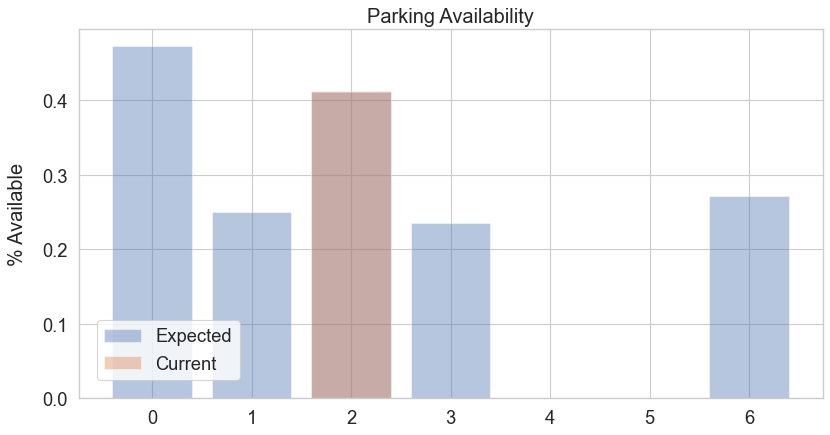

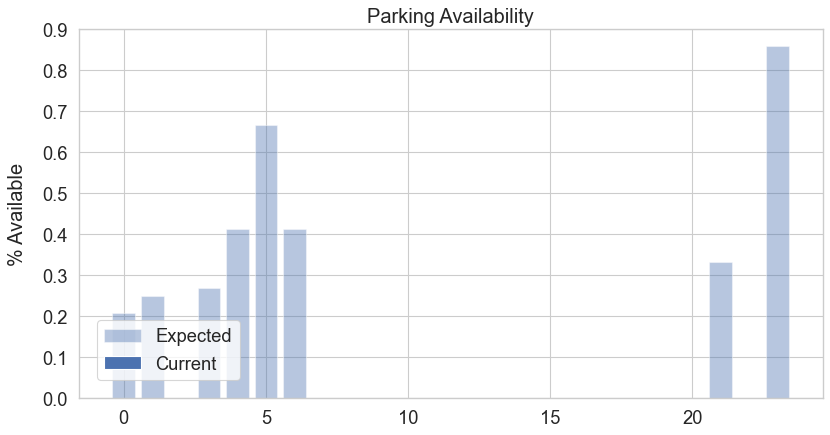

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

def get_daily_percentage_availability(df):
    df = df.copy()
    df['DayOfWeek'] = df['lastupdated'].dt.day_of_week
    counts = df.groupby('DayOfWeek').status_description.value_counts().unstack().fillna(0)
    counts['Percentage'] = counts['Unoccupied'] / (counts['Unoccupied'] + counts['Present'])
    return counts.reset_index()[['DayOfWeek', 'Percentage']]

def get_hourly_availability_trend(df):
    df['Hours'] = df['lastupdated'].dt.hour
    counts = df.groupby('Hours').status_description.value_counts().unstack().fillna(0)
    
    # Ensure both 'Unoccupied' and 'Present' columns exist
    if 'Unoccupied' not in counts:
        counts['Unoccupied'] = 0
    if 'Present' not in counts:
        counts['Present'] = 0

    counts['Availability'] = counts['Unoccupied'] / (counts['Present'] + counts['Unoccupied'])
    return counts.reset_index()[['Hours', 'Availability']]


def visualize_trend(expected, current, x_column='DayOfWeek', y_column='Percentage'):
    sns.set(font_scale=1.5)
    plt.figure(figsize=(12, 6), dpi=80)
    sns.set_style("whitegrid")
    plt.ylabel("% Available", labelpad=14)
    plt.title("Parking Availability", y=1)
    plt.bar(expected[x_column], expected[y_column], alpha=0.4, label="Expected")
    if current is not None:
        plt.bar(current[x_column], current[y_column], alpha=0.4, label="Current")
    plt.legend(loc="lower left", borderaxespad=1)
    plt.show()

# Filter out invalid date-time strings from 'lastupdated' column
loaded_df = loaded_df[loaded_df['lastupdated'] != 'lastupdated']

# Now, convert the 'lastupdated' column to datetime
loaded_df['lastupdated'] = pd.to_datetime(loaded_df['lastupdated'])


# Daily Analysis
daily_percentage = get_daily_percentage_availability(loaded_df)
current_df = loaded_df[loaded_df['lastupdated'].dt.date == datetime.now().date()]
current_daily_percentage = get_daily_percentage_availability(current_df)
visualize_trend(daily_percentage, current_daily_percentage)

# Hourly Analysis
expected_hourly = get_hourly_availability_trend(loaded_df)
current_hour_df = loaded_df[loaded_df['lastupdated'].dt.hour == datetime.now().hour]
current_hourly = get_hourly_availability_trend(current_hour_df)
visualize_trend(expected_hourly, current_hourly, 'Hours', 'Availability')



C:\Users\asas3\AppData\Local\Temp\ipykernel_23784\1140071401.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['lastupdated'].dt.date


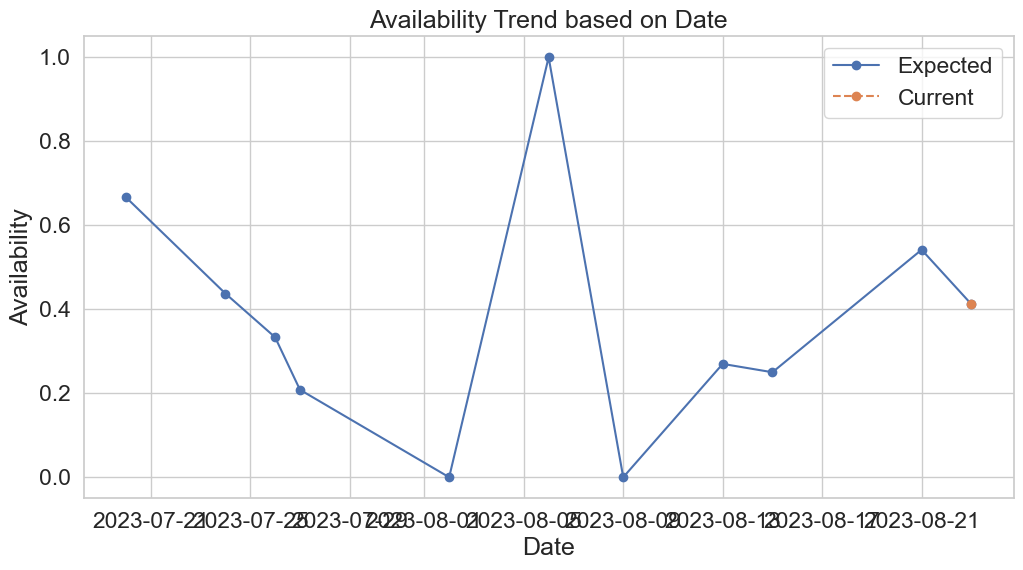

AttributeError: 'int' object has no attribute 'where'

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data from the CSV file
loaded_df = pd.read_csv('parking_sensor_data.csv')
loaded_df['lastupdated'] = pd.to_datetime(loaded_df['lastupdated'], errors='coerce')

def get_daily_percentage_availability(df):
    df['Date'] = df['lastupdated'].dt.date
    counts = df.groupby('Date').status_description.value_counts().unstack().fillna(0)
    counts['Availability'] = counts.get('Unoccupied', 0) / (counts.get('Present', 0) + counts.get('Unoccupied', 0))
    return counts.reset_index()[['Date', 'Availability']]

def get_hourly_availability_trend(df):
    df['Hours'] = df['lastupdated'].dt.hour
    counts = df.groupby('Hours').status_description.value_counts().unstack().fillna(0)
    
    # Handle division by zero
    denominator = (counts.get('Present', 0) + counts.get('Unoccupied', 0))
    counts['Availability'] = counts.get('Unoccupied', 0) / denominator.where(denominator != 0, 1)
    
    return counts.reset_index()[['Hours', 'Availability']]


def visualize_trend(expected, current, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(expected[x_label], expected[y_label], label='Expected', marker='o')
    plt.plot(current[x_label], current[y_label], label='Current', marker='o', linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{y_label} Trend based on {x_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Daily Analysis
daily_percentage = get_daily_percentage_availability(loaded_df)
current_df = loaded_df[loaded_df['lastupdated'].dt.date == datetime.now().date()]
current_daily_percentage = get_daily_percentage_availability(current_df)
visualize_trend(daily_percentage, current_daily_percentage, 'Date', 'Availability')

# Hourly Analysis
expected_hourly = get_hourly_availability_trend(loaded_df)
current_hour_df = loaded_df[loaded_df['lastupdated'].dt.hour == datetime.now().hour]
current_hourly = get_hourly_availability_trend(current_hour_df)
visualize_trend(expected_hourly, current_hourly, 'Hours', 'Availability')

In [53]:
print(loaded_df['lastupdated'].unique())

<DatetimeArray>
['2023-07-20 05:44:36+00:00', '2023-07-24 06:44:36+00:00',
 '2023-07-26 21:02:36+00:00', '2023-07-27 00:44:35+00:00',
 '2023-08-02 06:16:36+00:00', '2023-08-06 23:06:35+00:00',
 '2023-08-13 03:16:36+00:00', '2023-08-09 23:22:36+00:00',
 '2023-08-13 03:20:36+00:00', '2023-08-15 01:44:36+00:00',
 '2023-08-21 04:44:36+00:00', '2023-08-23 04:36:36+00:00']
Length: 12, dtype: datetime64[ns, UTC]


### old

In [ ]:
from datetime import datetime
from os.path import isfile

# fetch the latest parkign data and append to parking sensor file collection
def update_latest_parking_data():
    df, url_next, column_names = get_data(BASE_URL,SENSOR_DATASET)
    new_df =  pd.DataFrame(columns=column_names)
    new_df = add_to_dataframe(new_df, df)
    # Get the rest of the Dataset
    while url_next != None:
        df_new, url_next, column_names = get_data(BASE_URL,SENSOR_DATASET, new_df.shape[0])
        new_df = add_to_dataframe(new_df, df_new)

    # add another number to the csv
#     df = pd.DataFrame(client.get("vh2v-4nfs", limit=200000))
    new_df.drop(columns = ['location_lat','location_lon', 'lat', 'lon'], inplace = True)
    new_df['datetime'] = datetime.today().replace(microsecond=0) + datetime.timedelta(hours = 10) #Melbourne Time

    # if file already exists than we just want to append to the file
    # else we want to write a new file
    write_mode = 'w' if isfile('parking_sensor_data.csv') else 'a'

    new_df.to_csv('parking_sensor_data.csv', mode=write_mode, index = False)

import time

# simply press keys `ctrl + c` to stop the loop
try:
    while True:
        update_latest_parking_data()
        # wait for 15 minutes before fetching next latest
        time.sleep(15*60)
except KeyboardInterrupt:
    print('Finished fetching parking data.')

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# load data from csv file
df = pd.read_csv('parkingsensor.csv', parse_dates=True, infer_datetime_format=True)
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True, utc=True)

# subset of data for only todays date
current_df = df[df['datetime'].dt.date == datetime.now().date()]

# subset of data for only current hour
current_hour_df = df[df['datetime'].dt.hour == datetime.now().hour]

'''
This function will take in a data frame with entries for each sensor with respective day of week, and status columns
and return a dataframe of the form [{'DayOfWeek': string, 'Percentage': float32}]
'''
def get_daily_percentage_availability(df):
    df['DayOfWeek'] = df['datetime'].dt.day_of_week
    DailyParkingCounts = df.groupby('DayOfWeek').status.value_counts()
    DailyParkingCounts = DailyParkingCounts.unstack().reset_index()
    DailyParkingCounts['Percentage'] = (DailyParkingCounts['Unoccupied'] / (DailyParkingCounts['Unoccupied'] + DailyParkingCounts['Present']))
    DailyParkingCounts.reset_index(drop=True)
    return DailyParkingCounts[['DayOfWeek', 'Percentage']]

'''
Same as above function except deal with hourly availability as opposed to daily
'''
def get_hourly_availability_trend(df):
    df['Hours'] = df['datetime'].dt.hour
    DailyAvailability = df.groupby('Hours').status.value_counts()
    DailyAvailability = DailyAvailability.unstack().reset_index()
    DailyAvailability['Availability'] = DailyAvailability['Unoccupied'] / (DailyAvailability['Present'] + DailyAvailability['Unoccupied'])
    DailyAvailability = DailyAvailability.reset_index(drop=True)
    return DailyAvailability[['Hours', 'Availability']]

'''
    This function takes in an expected daily trend DataFrame as produced by the function above,
    and also a smaller 'current' DataFrame which has the same schema but with data only covering the current day
    of parking sensor activity.

    The output will be a visualization of the expected and current trends
'''
def visualize_trend(expected, current, x_column='DayOfWeek', y_column = 'Percentage'):
    # Visualize the results
    sns.set(font_scale=1.5)
    plt.figure(figsize=(12, 6), dpi=80)
    sns.set_style("whitegrid")

    plt.ylabel("% Available", labelpad=14)
    plt.title("Parking Availability", y=1)

    plt.bar(expected[x_column], expected[y_column], alpha=0.4 , label="Expected")
    plt.bar(current[x_column], current[y_column], alpha=0.4 , label="Current")
    # plt.bar(WednesdayCount['Day_Of_Week'], WednesdayCount['Parking_Availabilities'],alpha=0.4, label="Available Now")
    plt.legend(loc ="lower left", borderaxespad=1)
    plt.show()

### Daily Analysis
daily_percentage = get_daily_percentage_availability(df)
# perform analysis limited to today
current_daily_percentage = get_daily_percentage_availability(current_df)
#visualize daily results
visualize_trend(daily_percentage, current_daily_percentage)

### Hourly Analysis
expected_hourly = get_hourly_availability_trend(df)
current_hourly = get_hourly_availability_trend(current_hour_df)
visualize_trend(expected_hourly, current_hourly, 'Hours', 'Availability')






C:\Users\asas3\AppData\Local\Temp\ipykernel_23784\55761061.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('parkingsensor.csv', parse_dates=True, infer_datetime_format=True)


FileNotFoundError: [Errno 2] No such file or directory: 'parkingsensor.csv'